In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [2]:
df = pd.read_csv(r"C:\Users\senay\Desktop\ruhid shihkerimov\data_science.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.shape

(607, 12)

In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
# df.drop(columns=['Unnamed: 0','salary'],axis=1, inplace = True)
df= df.drop(columns=['Unnamed: 0','salary'],axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [7]:
df.shape

(607, 10)

## Average Salaries by Year

In [8]:
# mean by year
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2)
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

<AxesSubplot: xlabel='work_year'>

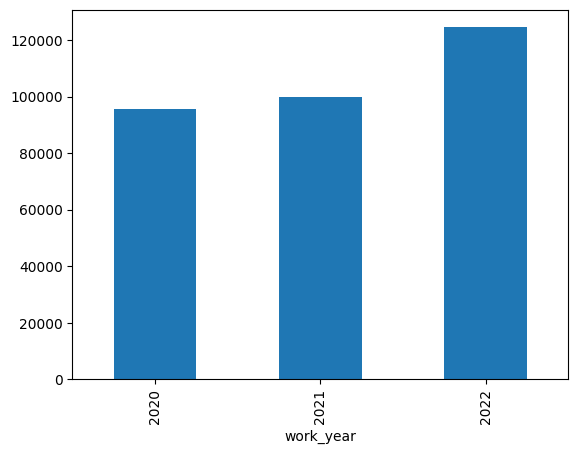

In [9]:
df1.plot(kind='bar')


In [10]:
df1.index

Index([2020, 2021, 2022], dtype='int64', name='work_year')

In [11]:
df1.values

array([ 95813.  ,  99853.79, 124522.01])

In [12]:
data = { 
    'work_year' : df1.index,
    'average_salary':df1.values

}

df1 = pd.DataFrame(data)
df1

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [13]:
df1['average_salary'] = (df1['average_salary']/1000).round(2)

In [14]:
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


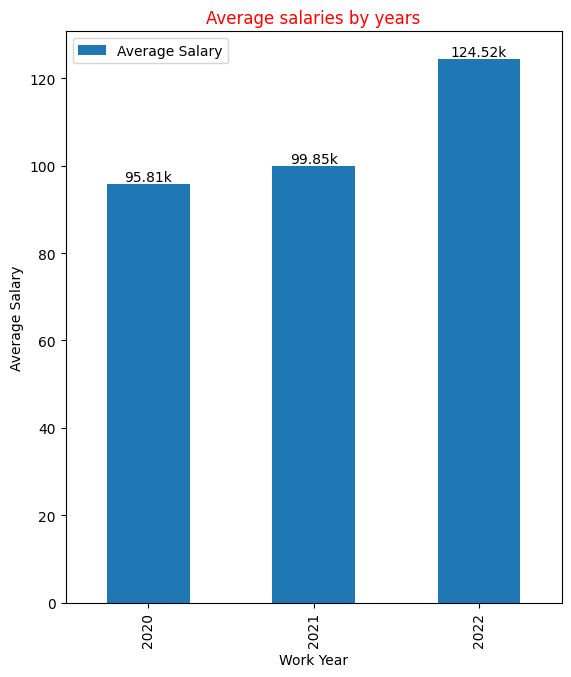

In [15]:
ax = df1.plot(kind='bar', x='work_year', y='average_salary',legend=True )
ax.bar_label(ax.containers[0], labels=df1['average_salary'].map('{:.2f}k'.format))
plt.subplots_adjust(top=1.3)
ax.legend(['Average Salary'], loc ='upper left')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average salaries by years', color ='red')
plt.show()

## Employees in remote positions

In [16]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [17]:
df2 = df.remote_ratio.value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [18]:
values = df2.to_list()
values

[381, 127, 99]

In [19]:
labels = ['Fully remote', 'No remote', 'Partially remote']
labels

['Fully remote', 'No remote', 'Partially remote']

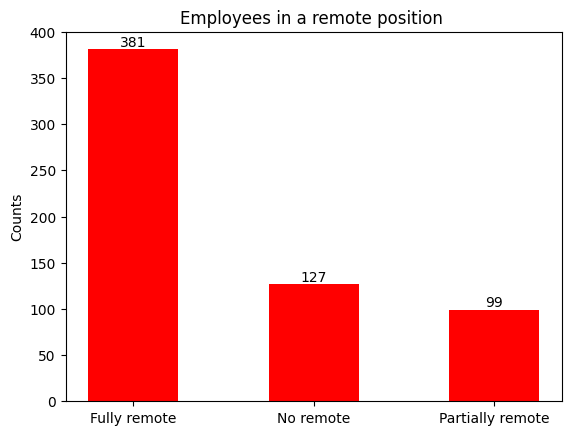

In [20]:
z = plt.bar(labels, values,width=0.5,color='red')
plt.bar_label(z, labels=values)
plt.title('Employees in a remote position ')
plt.ylabel('Counts')
plt.show()

In [21]:
df3 = df.company_size.value_counts()
df3

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [22]:
df3.index.to_list()

['M', 'L', 'S']

In [23]:
#df3.to_list()
values2 = df3.values

In [24]:
labels_for_company = ['Medium', 'Large', 'Small']

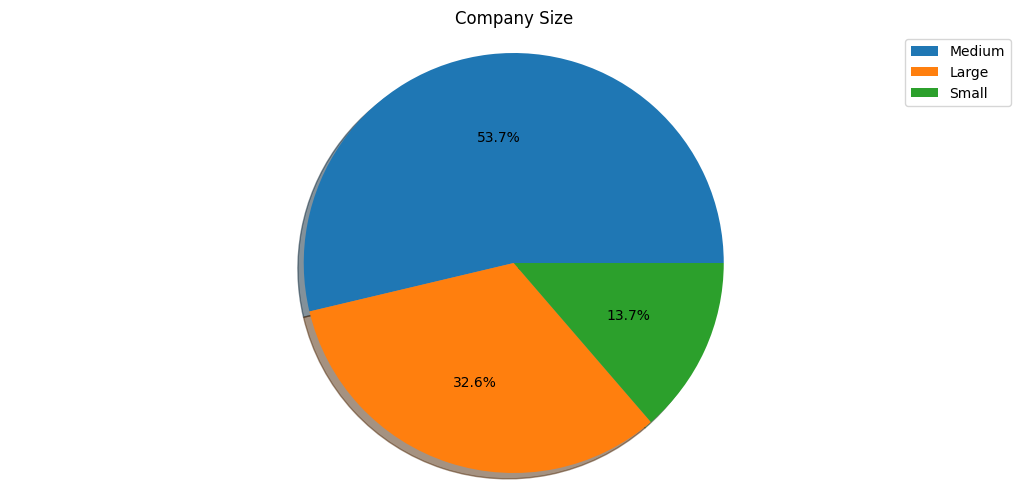

In [25]:
plt.figure(figsize=(13,6))
plt.pie(x = values2, labels = None, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.legend(labels =labels_for_company, loc='upper right')
plt.title('Company Size')
plt.show()

# Top 5 Job Titles

In [26]:
# df.job_title.value_counts().head(4)
df4 = df.job_title.value_counts()[:5]
df4

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

<BarContainer object of 5 artists>

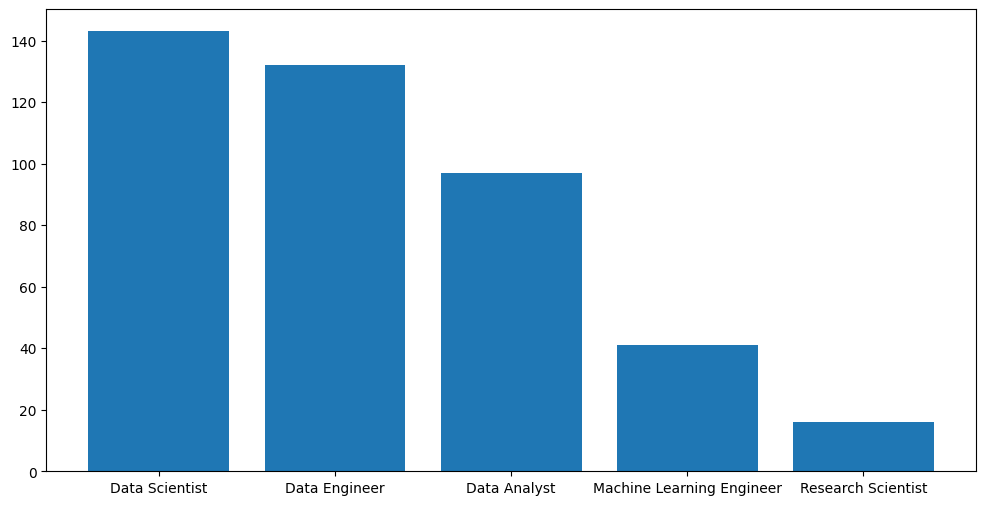

In [27]:
plt.figure(figsize=(12,6))
plt.bar(x = df4.index, height = df4.values)

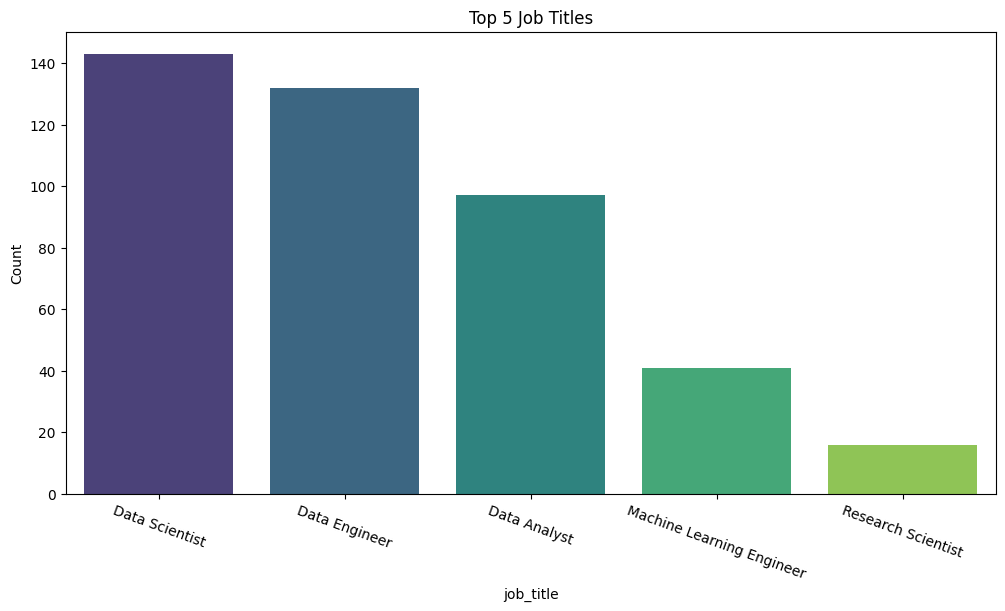

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=df4.index, y=df4.values, palette = 'viridis')
plt.title('Top 5 Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=-20)
plt.show()

# Distribution of Salary by Company Size

In [29]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [30]:
df5 = df[['salary_in_usd','company_size']]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [31]:
S = df5[df5['company_size']=='S']
M = df5[df5['company_size']=='M']
L = df5[df5['company_size']=='L']


label = ['Small', 'Mean', 'Large']


sal_mean = [S['salary_in_usd'].mean(),M['salary_in_usd'].mean(),L['salary_in_usd'].mean()]

sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [32]:
label_change = np.round([x/1000 for x in sal_mean],2)
label_change = list(map(str, label_change))
label_change = [x + ' K' for x in label_change]
label_change

['77.63 K', '116.91 K', '119.24 K']

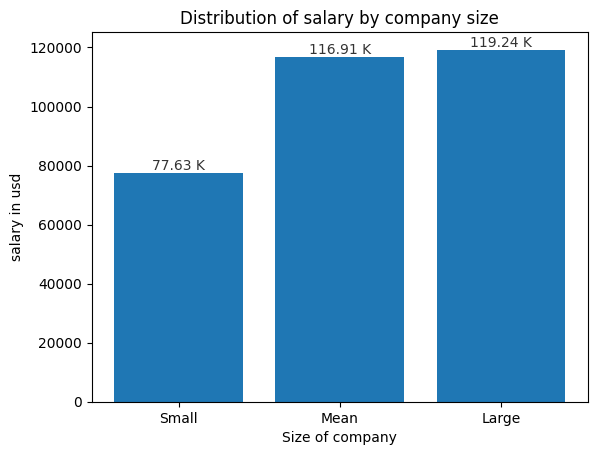

In [33]:
z = plt.bar(label, sal_mean)
plt.bar_label(z, label_change,alpha=0.8)
plt.title('Distribution of salary by company size')
plt.xlabel('Size of company')
plt.ylabel('salary in usd')
plt.show()

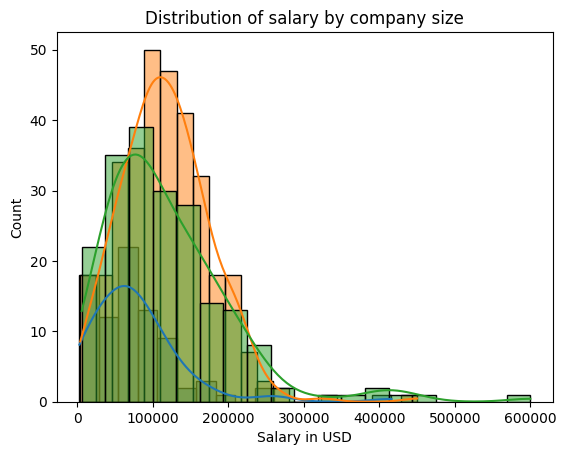

In [34]:
sns.histplot(S['salary_in_usd'], label='Small', kde=True)
sns.histplot(M['salary_in_usd'], label='Medium', kde=True)
sns.histplot(L['salary_in_usd'], label='LArge', kde=True)

plt.title('Distribution of salary by company size')
plt.xlabel('Salary in USD')
plt.show()

# Experience Level of Employee

In [35]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [36]:
df6 = df.experience_level.value_counts()
df6

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [37]:
df6.index.to_list()

['SE', 'MI', 'EN', 'EX']

In [38]:
#df['experience_level'].replace('SE', 'Senior', inplace=True)

In [39]:
exp_map = {
    'SE': 'Seniors',
    'MI': 'Middle',
    'EN': 'Entry',
    'EX': 'Executive' 
 
}

In [47]:
df['experience_level'].replace(exp_map,inplace=True)

In [48]:
df['experience_level'].value_counts()

experience_level
Seniors      280
Middle       213
Entry         88
Executive     26
Name: count, dtype: int64

In [50]:
labels = df6.index.to_list()
labels

['SE', 'MI', 'EN', 'EX']

In [51]:
df6 = df.experience_level.value_counts()
df6

experience_level
Seniors      280
Middle       213
Entry         88
Executive     26
Name: count, dtype: int64

In [52]:
labels = df6.index.to_list()
labels

['Seniors', 'Middle', 'Entry', 'Executive']

In [53]:
values = df6.values
values

array([280, 213,  88,  26], dtype=int64)

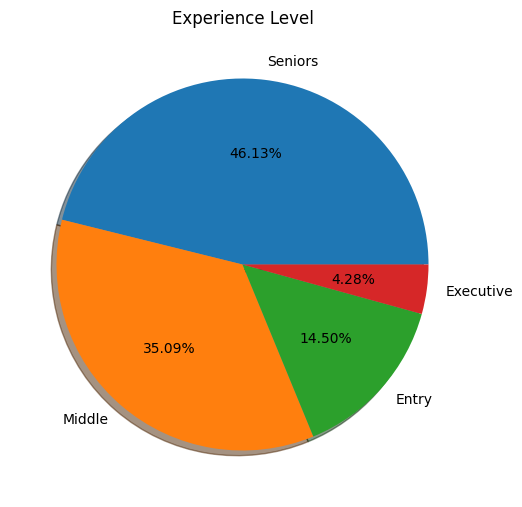

In [71]:
plt.figure(figsize=(6,12))

plt.pie(x=values, labels= labels, autopct='%1.2f%%' , shadow=True)

plt.title('Experience Level')

plt.show()